In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv("survey_results_public.csv")

In [4]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [6]:
df=df[["Country", "EdLevel","YearsCode","Employment","ConvertedCompYearly"]]
df=df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Employed, full-time;Independent contractor, fr...",23456.0


In [7]:
df=df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     48019 non-null  object 
 1   EdLevel     48019 non-null  object 
 2   YearsCode   47950 non-null  object 
 3   Employment  48007 non-null  object 
 4   Salary      48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [9]:
df=df.dropna()
df.isnull().sum()

Country       0
EdLevel       0
YearsCode     0
Employment    0
Salary        0
dtype: int64

In [11]:
df["Employment"].value_counts()

Employment
Employed, full-time                                                                             39241
Independent contractor, freelancer, or self-employed                                             3899
Employed, full-time;Independent contractor, freelancer, or self-employed                         3289
Employed, part-time                                                                               906
Independent contractor, freelancer, or self-employed;Employed, part-time                          240
Employed, full-time;Employed, part-time                                                           154
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
I prefer not to say                                                                                34
Retired                                                                                            33
Independent contractor, freelancer, or self-employed;Retired           

In [12]:
df=df[df["Employment"]=="Employed, full-time"]
df=df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39241 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    39241 non-null  object 
 1   EdLevel    39241 non-null  object 
 2   YearsCode  39241 non-null  object 
 3   Salary     39241 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [13]:
df['Country'].value_counts()

Country
United States of America                                10589
Germany                                                  3212
United Kingdom of Great Britain and Northern Ireland     3083
Canada                                                   1812
India                                                    1609
                                                        ...  
Saint Lucia                                                 1
Mauritania                                                  1
Botswana                                                    1
Sierra Leone                                                1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [14]:
df.head()

,Country,EdLevel,YearsCode,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,4,135000.0


In [16]:
def shorten_categories(categories, cutoff): #this is to remove the extra countries, or the countries which doesnt have many developers
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
            categorical_map[categories.index[i]]='Other'
    return categorical_map

In [17]:
country_map = shorten_categories(df.Country.value_counts(),400)
df['Country']=df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                10589
Other                                                    9296
Germany                                                  3212
United Kingdom of Great Britain and Northern Ireland     3083
Canada                                                   1812
India                                                    1609
France                                                   1464
Netherlands                                              1004
Australia                                                 988
Brazil                                                    971
Spain                                                     970
Sweden                                                    882
Italy                                                     825
Poland                                                    741
Switzerland                                               511
Denmark                                                   440


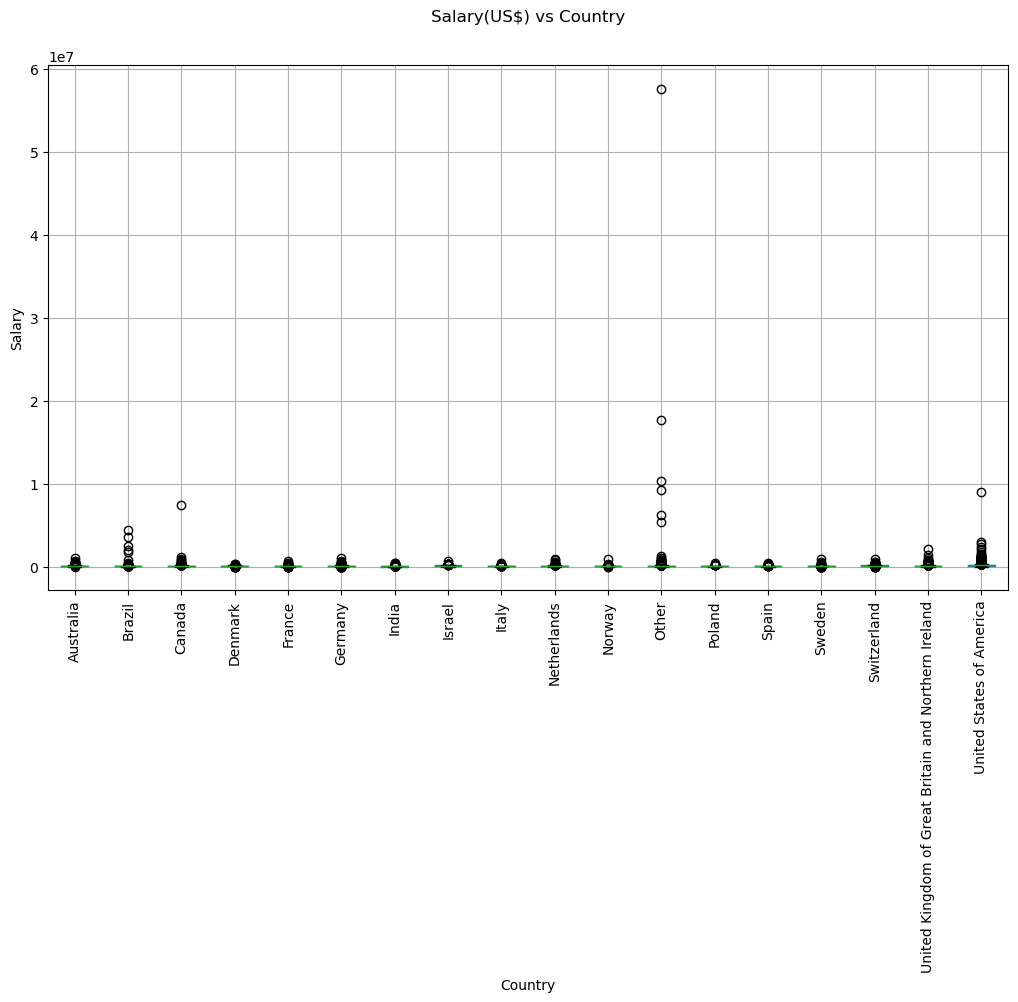

In [18]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary(US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [19]:
df = df[df["Salary"]<=250000]
df=df[df["Salary"]>=10000]
df=df[df['Country']!='Other']

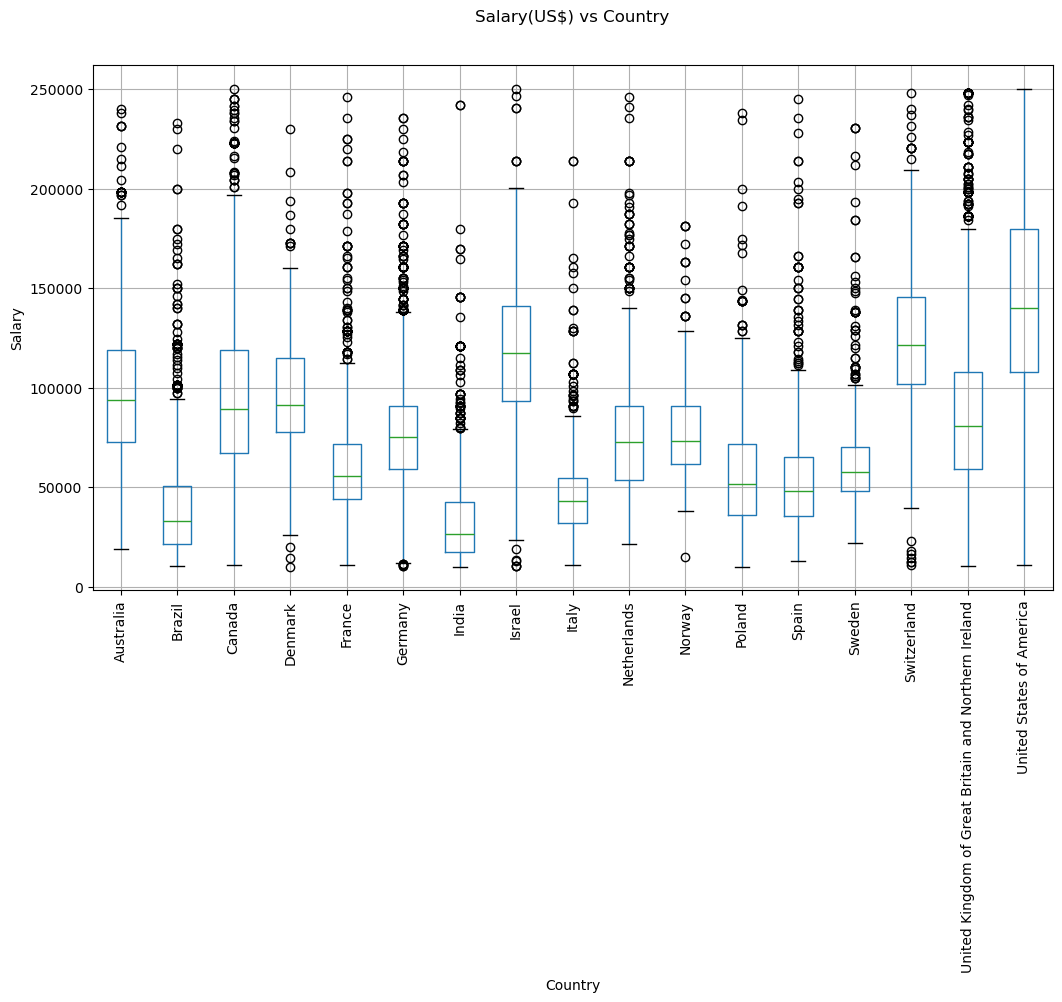

In [20]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.title('')
plt.ylabel('Salary')
plt.suptitle('Salary(US$) vs Country')
plt.xticks(rotation=90)
plt.show()

In [21]:
#to clean the yrs of code 
df["YearsCode"].unique()

array(['27', '12', '21', '4', '5', '10', '15', '11', '24', '6', '20',
       '13', 'Less than 1 year', '3', '16', '33', '32', '29', '26', '7',
       '14', '8', '9', '23', '35', '30', '40', '45', '31', '43', '25',
       '22', '18', '17', '42', '39', '38', '28', '1', '19', '2', '44',
       '37', '34', '41', '36', '48', 'More than 50 years', '49', '47',
       '50', '46'], dtype=object)

In [22]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df['YearsCode']=df['YearsCode'].apply(clean_experience)

In [23]:
df

,Country,EdLevel,YearsCode,Salary
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27.0,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21.0,96828.0
6,United States of America,Some college/university study without earning ...,4.0,135000.0
7,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,80000.0
...,...,...,...,...
89156,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,195000.0
89158,Sweden,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11.0,52981.0
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30.0,50719.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,15752.0


In [24]:
df.columns

Index(['Country', 'EdLevel', 'YearsCode', 'Salary'], dtype='object')

In [25]:
df_clean = df.copy() 

In [26]:
df_clean.columns

Index(['Country', 'EdLevel', 'YearsCode', 'Salary'], dtype='object')

In [27]:
df_clean['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [28]:
def clean_education(df_copy):
    """
    This function cleans the 'EdLevel' column in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the 'EdLevel' column.

    Returns:
        pandas.DataFrame: The DataFrame with the cleaned 'EdLevel' column.
    """

    df['EdLevel'] = df['EdLevel'].apply(lambda x: 
        'Bachelor’s degree' if 'Bachelor’s degree' in x else (
            'Master’s degree' if 'Master’s degree' in x else (
                'Post grad' if ('Professional degree' in x or 'Other doctoral' in x) else
                'Less than a Bachelors'
            )
        )
    )
    return df


In [29]:
df_clean = df.copy()
df_clean = clean_education(df_clean)

In [30]:
df_clean['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

Create a copy of your data everytime you clean it !!

In [31]:
df_cleaned_education = df.copy()

To convert the string value to numeric value, we use label encoder so that the computer knows the value it has assigned to the string.

In [32]:
df['Country'].value_counts()

Country
United States of America                                9445
Germany                                                 3159
United Kingdom of Great Britain and Northern Ireland    3020
Canada                                                  1762
France                                                  1447
India                                                   1131
Netherlands                                              984
Australia                                                965
Spain                                                    961
Sweden                                                   849
Brazil                                                   839
Italy                                                    813
Poland                                                   685
Switzerland                                              480
Norway                                                   426
Denmark                                                  425
Israel          

In [33]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel']=le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [34]:
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])
df['Country'].unique()

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

Splitting the OG data in X and y. X has the df without the salary option and y has only salary column.

In [35]:
#Training data
X=df.drop("Salary",axis=1)
y=df['Salary']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [36]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
sp_model = DecisionTreeRegressor(random_state=1)
sp_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [37]:
val_predictions = sp_model.predict(X_test)
val_mae = mean_absolute_error(val_predictions,y_test)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 27,855


In [38]:
sp_model = DecisionTreeRegressor(max_leaf_nodes=100,random_state=1)
sp_model.fit(X_train, y_train)
val_predictions = sp_model.predict(X_test)
val_mae = mean_absolute_error(val_predictions, y_test)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


Validation MAE for best value of max_leaf_nodes: 26,706


In [ ]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [39]:
from sklearn.ensemble import RandomForestRegressor


In [40]:
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(X_train,y_train)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions= rf_model.predict(X_test)
rf_val_mae = mean_absolute_error(rf_val_predictions,y_test)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 27584.39426657356


Text(0, 0.5, 'Predicted Salaries')

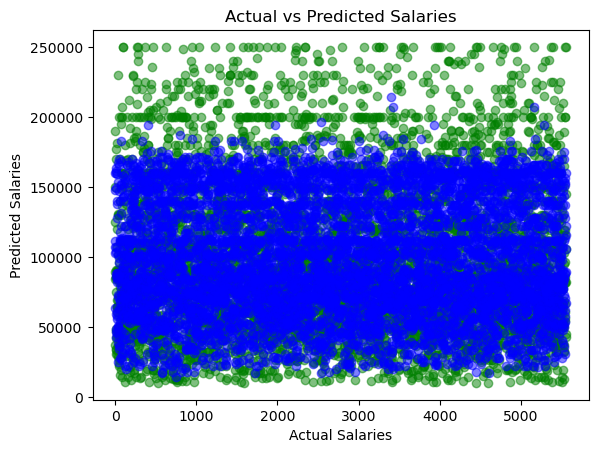

In [131]:
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual', alpha=0.5)
plt.scatter(range(len(rf_val_predictions)), rf_val_predictions, color='blue', label='Predicted', alpha=0.5)
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")

In [133]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [None, 2, 4, 6, 8, 10, 12]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), params, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [134]:
y_pred_test = model.predict(X_test)

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f'Testing Set Metrics:')
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')

Testing Set Metrics:
Mean Squared Error (MSE): 1419430796.73
Mean Absolute Error (MAE): 27854.53
Root Mean Squared Error (RMSE): 37675.33


In [136]:
print(f'Initial Model Metrics on Training Set:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Initial Model Metrics on Training Set:
Mean Squared Error (MSE): 1419430796.73
Mean Absolute Error (MAE): 27854.53
Root Mean Squared Error (RMSE): 37675.33


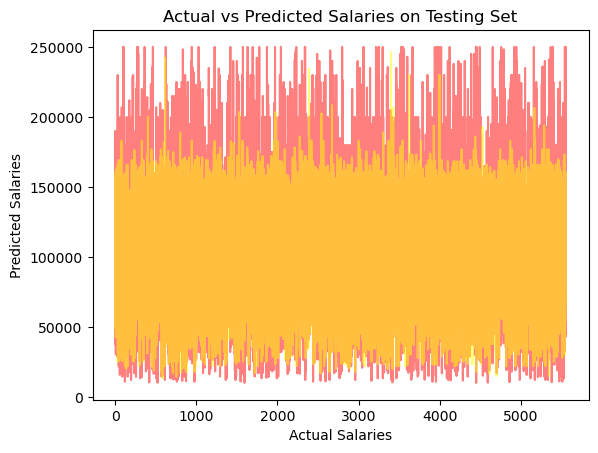

In [137]:
import matplotlib.pyplot as plt

plt.plot(range(len(y_test)), y_test, color='red', label='Actual', alpha=0.5)
plt.plot(range(len(y_pred_test)), y_pred, color='yellow', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Salaries on Testing Set')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.show()

### Implementing Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [44]:
linear_reg.fit(X_train, y_train)
y_pred=linear_reg.predict(X_test)

In [140]:
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [141]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 2145620669.87
Mean Absolute Error (MAE): 36886.87
R-squared (R2): 0.26


### Implementing Random Forest Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [143]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Metrics:')
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'R-squared (R2): {r2_rf:.2f}')


Random Forest Metrics:
Mean Squared Error (MSE): 1382287590.73
Mean Absolute Error (MAE): 27584.39
R-squared (R2): 0.52


Text(0, 0.5, 'Predicted Salaries')

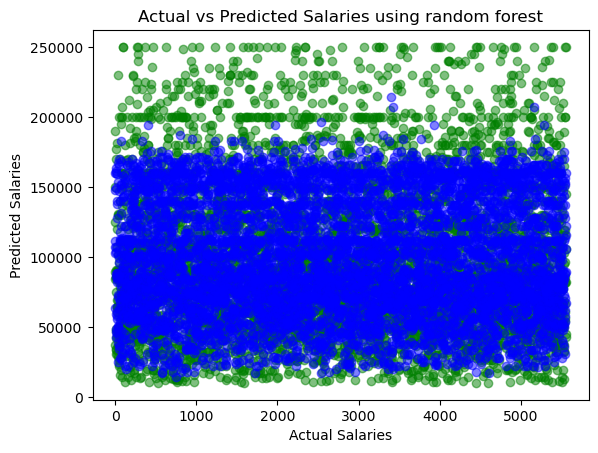

In [118]:
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred_rf, color='blue', label='Predicted', alpha=0.5)
plt.title("Actual vs Predicted Salaries using random forest")
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")

### Implementing Gradient Boosting Regressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=1)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

In [94]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Regressor')
print(f'Mean Squared Error (MSE): {mse_gb:.2f}')
print(f'Mean Absolute Error (MAE): {mae_gb:.2f}')
print(f'R-squared (R2): {r2_gb:.2f}')


Gradient Boosting Regressor
Mean Squared Error (MSE): 1305448758.08
Mean Absolute Error (MAE): 26872.09
R-squared (R2): 0.55


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid ={'n_estimators':[50,100,200], 'max_depth':[None,10,20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state = 1),param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

In [52]:
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

In [53]:
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print the evaluation metrics for the best model
print('Best Random Forest Metrics:')
print(f'Mean Squared Error (MSE): {mse_best_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_best_rf:.2f}')
print(f'R-squared (R2): {r2_best_rf:.2f}')

Best Random Forest Metrics:
Mean Squared Error (MSE): 1355962903.22
Mean Absolute Error (MAE): 27195.53
R-squared (R2): 0.54


In [54]:
residuals_rf = y_test - y_pred_rf
# Visualize or analyze the residuals
residuals_rf

24569    -88048.721575
46798       351.181307
8419     -10928.025316
32594     39850.352955
4739       -393.336226
             ...      
1548     -16731.697268
16953    148311.429081
70702     46275.318014
11392      4317.811423
83584    -30884.869998
Name: Salary, Length: 5555, dtype: float64

In [55]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [56]:
conda install seaborn


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda




C:\Users\navya\anaconda\envs\ml\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


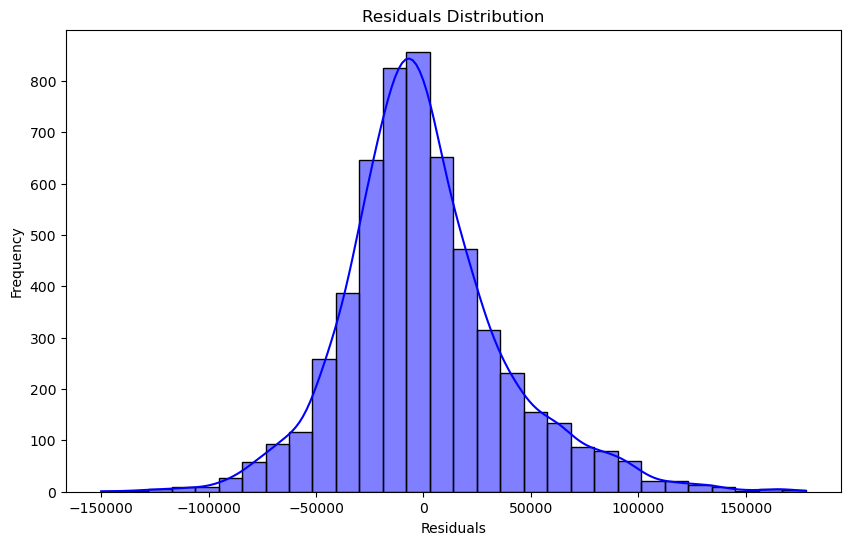

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, color='blue', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [58]:
import pickle

In [59]:
data={"model":model,"le_country":le_country,"le_education":le_education}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [60]:
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)
regressor_loaded = data["model"]
le_country=data["le_country"]
le_education=data["le_education"]

In [61]:
y_pred=regressor_loaded.predict(X)
y_pred

array([167445.89230769, 147473.58333333,  69517.5       , ...,
        39723.5       ,  22476.59259259,  69786.        ])

In [62]:
df_cleaned_education


,Country,EdLevel,YearsCode,Salary
2,United States of America,Bachelor’s degree,27.0,250000.0
3,United States of America,Bachelor’s degree,12.0,156000.0
5,United Kingdom of Great Britain and Northern I...,Less than a Bachelors,21.0,96828.0
6,United States of America,Less than a Bachelors,4.0,135000.0
7,United States of America,Bachelor’s degree,5.0,80000.0
...,...,...,...,...
89156,United States of America,Bachelor’s degree,12.0,195000.0
89158,Sweden,Bachelor’s degree,11.0,52981.0
89162,Brazil,Master’s degree,30.0,50719.0
89167,India,Bachelor’s degree,6.0,15752.0


In [63]:
df_cleaned_education['EdLevel'].value_counts()

EdLevel
Bachelor’s degree        13359
Master’s degree           7462
Less than a Bachelors     5530
Post grad                 1423
Name: count, dtype: int64

In [145]:
df

,Country,EdLevel,YearsCode,Salary
2,16,0,27.0,250000.0
3,16,0,12.0,156000.0
5,15,1,21.0,96828.0
6,16,1,4.0,135000.0
7,16,0,5.0,80000.0
...,...,...,...,...
89156,16,0,12.0,195000.0
89158,13,0,11.0,52981.0
89162,1,2,30.0,50719.0
89167,6,0,6.0,15752.0
